<a href="https://colab.research.google.com/github/liangli217/PyTorch_ML/blob/main/Makemore_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [59]:
#build the dataset

block_size = 3
X,Y = [], []

for w in words:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


In [78]:
#build the dataset

def build_dataset(words):
  block_size = 3
  X,Y = [], []

  for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X, Y

import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8* len(words))
n2 = int(0.9* len(words))


Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtr, Yte = build_dataset(words[n2:])



In [60]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [6]:
C = torch.randn(27,2)
C[5]

tensor([0.9653, 0.0455])

In [7]:
F.one_hot(torch.tensor(5), num_classes = 27).shape

torch.Size([27])

In [8]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [9]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)


In [10]:
h = torch.tanh(emb.view(-1,6)@ W1 + b1)

In [11]:
h.shape

torch.Size([32, 100])

In [12]:
b1.shape

torch.Size([100])

In [13]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)

In [14]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [20]:
counts.sum(1, keepdim = True).shape


torch.Size([32, 1])

In [15]:
counts = logits.exp()
# counts (32, 27)


probs = counts/counts.sum(1, keepdim = True)
probs.shape

torch.Size([32, 27])

In [24]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [29]:
loss = -probs[torch.arange(32),Y].log().mean()

In [30]:

loss

tensor(17.2150)

In [ ]:
# now more respectable code

In [79]:
Xtr.shape, Ytr.shape

(torch.Size([22799, 3]), torch.Size([182580]))

In [122]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30, 200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [144]:
#andrej
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [145]:
sum(p.nelement() for p in parameters)

11897

In [54]:
#  forward pass
# emb = C[X]
# h = torch.tanh(emb.view(-1, 6) @ W1 +b1)
# logits = h @ W2 + b2
# print(logits.shape)
# loss = F.cross_entropy(logits, Y)
# loss


torch.Size([32, 27])


tensor(0.2556, grad_fn=<NllLossBackward0>)

In [146]:

for p in parameters:
  p.requires_grad = True

In [147]:
lossi = []
stepi = []

In [153]:
# backward pass



for i in range(50000):

  # minibatch cosntruct
  # the direction is not as reliable but the gradient direction is good enough.
  # it's much better to have an approximate gradient and just make more steps than it is to evaluate the exact gradient and take fewer steps

  ix = torch.randint(0, Xtr.shape[0], (32,))


  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 +b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())
  for p in parameters:
    p.grad = None

  loss.backward()
  for p in parameters:
    p.data -= 0.01* p.grad


  stepi.append(i)
  lossi.append(loss.log10().item())


In [155]:

len(lossi)

100000

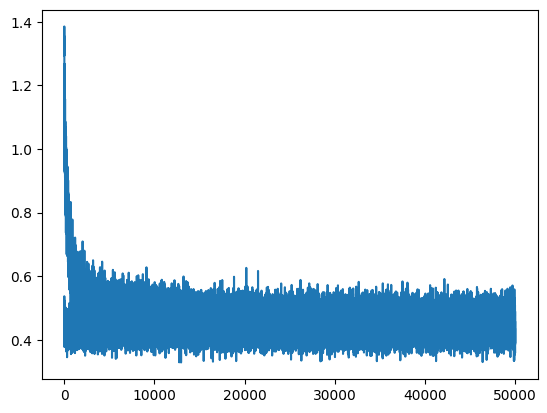

In [158]:
plt.plot(stepi, lossi)

In [156]:
loss.item()

2.7129974365234375

In [157]:
# training, dev/validation, test split
# 80%, 10%, 10%

emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 +b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss


tensor(3.0574, grad_fn=<NllLossBackward0>)